<a href="https://colab.research.google.com/github/helianakhjavani/Tensorflow/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation #import animation support
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#generating some house sizes between 1000 and 3500
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low = 1000, high = 3500, size = num_house)

#generating house prices from house size with a random nose added 
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low = 20000, high = 70000, size = num_house)

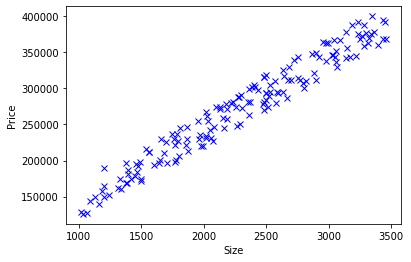

In [4]:
#plot generated house and size
plt.plot(house_size, house_price, 'bx') #bx = blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [5]:
#You need to normalize values to prevet under/overflows
def normalize(array):
  return(array-array.mean()) / array.std()

In [6]:
#define number of training samples  0.7 = 70% 
num_train_samples = math.floor(num_house * 0.7)

In [8]:
#define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price )


In [9]:
#define test data
test_house_size = np.asarray(house_size[num_train_samples:])
test_house_price = np.asarray(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test__house_price_norm = normalize(test_house_price )

Tesor types:


constant - constant value


variable - values adjusted in graph


placeholder - used to pass data into graph

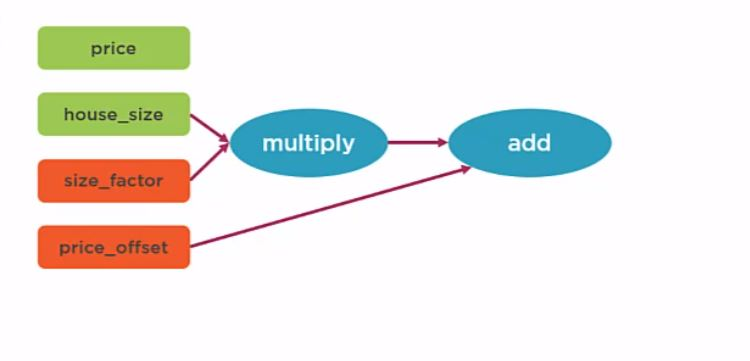

In [13]:
# set up th Tensorflow placeholders that get updated as we descend down the gradient
tf_house_size = tf.placeholder("float", name = "house_size")
tf_price = tf.placeholder("float", name = "price")

In [15]:
# Define the variables holding the size_factor and price we set  during training.
# We initialize them to some random values based on the normal distributions
tf_size_factor = tf.Variable(np.random.rand(), name = "size_factor" )
tf_price_offset = tf.Variable(np.random.rand(), name = "price_offset")

In [16]:
# 2. Define the operations for the pedicting values - predicted price = (size_factor * house*size) + price_offset
# Notice the use of the tensorflow add and multiply functions. These add the operations to the computation graph,
# AND the tensorflow methods understand how to deal with Tnesors. Therefore do not try to use numpy or other library
# methods 
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

In [17]:
# 3. Define the Loss Function(how much error) - Mean Squared error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price,2))/(2*num_train_samples)

In [32]:
# Optimizer leaning rate. the size of the steps down the gradietn
learning_rate = 0.1

In [33]:
# 4. define a Gradient descent optimizer that will minimize the loss defined in ther operation "cost"
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

iteration #: 0002 cost= 0.345919907 size_factor= 0.26427862 price_offset= 0.3737702
iteration #: 0004 cost= 0.238385156 size_factor= 0.39424798 price_offset= 0.3060217
iteration #: 0006 cost= 0.166352332 size_factor= 0.5006316 price_offset= 0.25056502
iteration #: 0008 cost= 0.118102819 size_factor= 0.5877099 price_offset= 0.2051697
iteration #: 0010 cost= 0.085786268 size_factor= 0.65898544 price_offset= 0.16801053
iteration #: 0012 cost= 0.064142570 size_factor= 0.717327 price_offset= 0.13759315
iteration #: 0014 cost= 0.049648348 size_factor= 0.7650809 price_offset= 0.112694286
iteration #: 0016 cost= 0.039942909 size_factor= 0.80416924 price_offset= 0.09231289
iteration #: 0018 cost= 0.033444989 size_factor= 0.83616406 price_offset= 0.07562926
iteration #: 0020 cost= 0.029095281 size_factor= 0.8623525 price_offset= 0.061972577
iteration #: 0022 cost= 0.026184119 size_factor= 0.88378865 price_offset= 0.05079362
iteration #: 0024 cost= 0.024236269 size_factor= 0.9013343 price_offset=

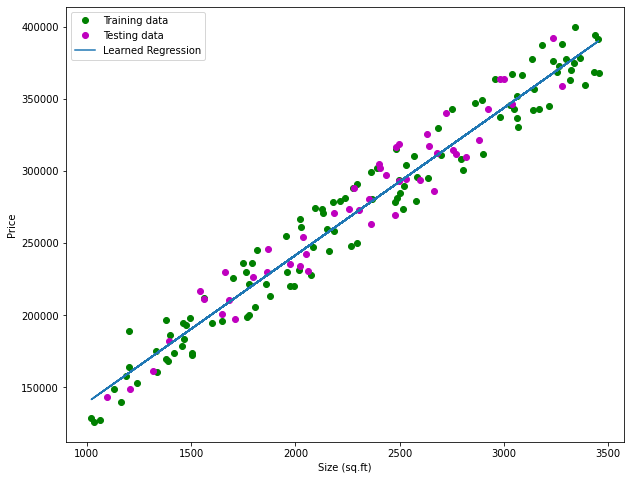

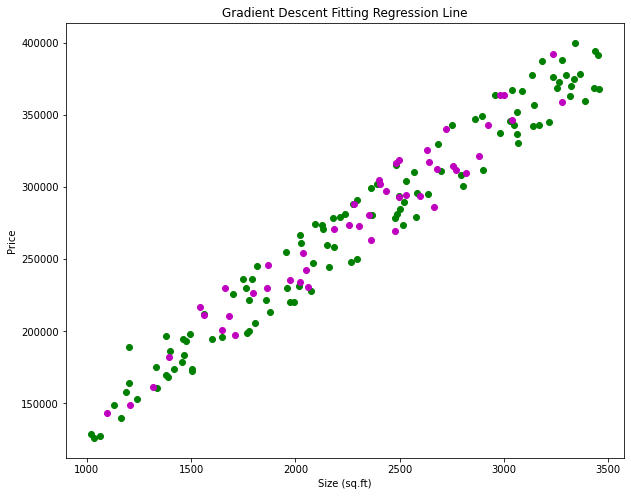

In [52]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph in the session
with tf.Session() as sess:
    sess.run(init)

    # set how often to display training progress and number of training iterations
    display_every = 2
    num_training_iter = 50

    # calculate the number of lines to animation
    fit_num_plots = math.floor(num_training_iter/display_every)
    # add storage of factor and offset values from each epoch
    fit_size_factor = np.zeros(fit_num_plots)
    fit_price_offsets = np.zeros(fit_num_plots)
    fit_plot_idx = 0    

   # keep iterating the training data
    for iteration in range(num_training_iter):

        # Fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})

        # Display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price:train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
            # Save the fit size_factor and price_offset to allow animation of learning process
            fit_size_factor[fit_plot_idx] = sess.run(tf_size_factor)
            fit_price_offsets[fit_plot_idx] = sess.run(tf_price_offset)
            fit_plot_idx = fit_plot_idx + 1

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')


   # Plot of training and test data, and learned regression
    
    # get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
             (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
             label='Learned Regression')
 
    plt.legend(loc='upper left')
    plt.show()



    # 
    # Plot another graph that animation of how Gradient Descent sequentually adjusted size_factor and price_offset to 
    # find the values that returned the "best" fit line.
    fig, ax = plt.subplots()
    line, = ax.plot(house_size, house_price)

    plt.rcParams["figure.figsize"] = (10,8)
    plt.title("Gradient Descent Fitting Regression Line")
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')

    def animate(i):
        line.set_xdata(train_house_size_norm * train_house_size_std + train_house_size_mean)  # update the data
        line.set_ydata((fit_size_factor[i] * train_house_size_norm + fit_price_offsets[i]) * train_price_std + train_price_mean)  # update the data
        return line,
 
     # Init only required for blitting to give a clean slate.
    def initAnim():
        line.set_ydata(np.zeros(shape=house_price.shape[0])) # set y's to 0
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, fit_plot_idx), init_func=initAnim,
                                 interval=1000, blit=True)

    plt.show()     